<a href="https://colab.research.google.com/github/khaled-bit/Data-Science/blob/main/malaria_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d miracle9to9/files1
! unzip files1

Streaming output truncated to the last 5000 lines.
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

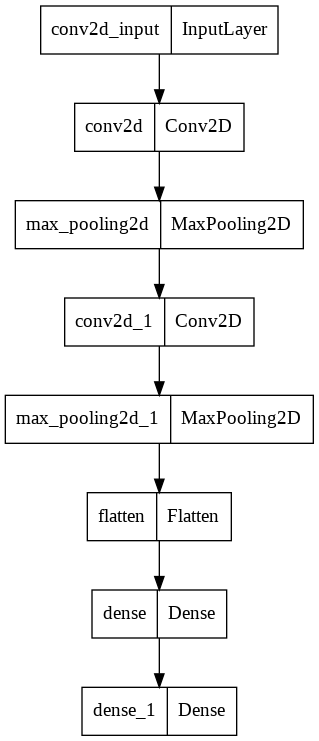

In [ ]:
classifier = Sequential()

classifier.add(Convolution2D(64, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])

plot_model(classifier)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
        'Malaria Cells/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'Malaria Cells/testing_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 27558 images belonging to 2 classes.
Found 15832 images belonging to 2 classes.


dict_items([(0, 7952), (1, 7880)])
dict_items([(0, 13779), (1, 13779)])


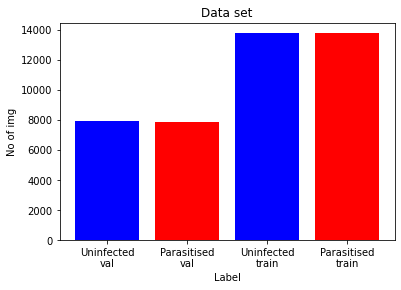

In [ ]:
from collections import Counter
counter=Counter(test_set.classes)
print(counter.items())
counter2=Counter(training_set.classes)
print(counter2.items())

left = [1, 2, 3, 4]
height = [counter[0],counter[1],counter2[0],counter2[1]]
tick_label = ['Uninfected\nval', 'Parasitised\nval', 'Uninfected\ntrain', 'Parasitised\ntrain']
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'red'])
plt.ylabel('No of img')
plt.xlabel('Label')
plt.title('Data set')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
steps_per_epoch = len(training_set)

validation_steps = len(test_set)

classifier.fit_generator(
        training_set,
        steps_per_epoch=steps_per_epoch,
        epochs=15,
        validation_data=test_set,
        validation_steps=validation_steps,
        callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/15
862/862 [==============================] - 101s 116ms/step - loss: 0.6209 - accuracy: 0.6554 - val_loss: 0.5421 - val_accuracy: 0.7516
Epoch 2/15
862/862 [==============================] - 101s 117ms/step - loss: 0.5217 - accuracy: 0.7580 - val_loss: 0.4281 - val_accuracy: 0.8210
Epoch 3/15
862/862 [==============================] - 101s 117ms/step - loss: 0.3787 - accuracy: 0.8490 - val_loss: 0.2963 - val_accuracy: 0.8959
Epoch 4/15
862/862 [==============================] - 99s 115ms/step - loss: 0.2877 - accuracy: 0.8908 - val_loss: 0.2436 - val_accuracy: 0.8979
Epoch 5/15
862/862 [==============================] - 101s 118ms/step - loss: 0.2544 - accuracy: 0.9036 - val_loss: 0.2329 - val_accuracy: 0.9151
Epoch 6/15
862/862 [==============================] - 101s 117ms/step - loss: 0.2387 - accuracy: 0.9103 - val_loss: 0.2185 - val_accuracy: 0.9154
Epoch 7/15
862/862 [==============================] - 100s 116ms/step - loss: 0.2286 - accuracy: 0.9135 - val_loss: 0.2332 - 

In [ ]:
classifier.save('model2022.h5')

In [ ]:
import pandas as pd
losses = pd.DataFrame(classifier.history.history)
losses


,loss,accuracy,val_loss,val_accuracy
0,0.620939,0.655381,0.542140,0.751642
1,0.521722,0.758001,0.428081,0.820995
2,0.378687,0.848973,0.296294,0.895907
3,0.287728,0.890812,0.243624,0.897928
4,0.254386,0.903585,0.232893,0.915109
5,0.238729,0.910335,0.218475,0.915361
6,0.228648,0.913455,0.233233,0.897233
7,0.216247,0.918499,0.190827,0.924204
8,0.211841,0.922527,0.188506,0.936395
9,0.209257,0.923470,0.190480,0.935447


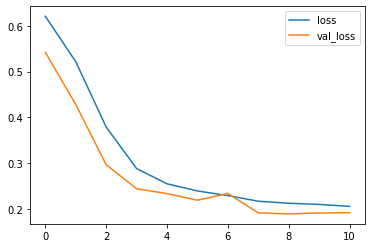

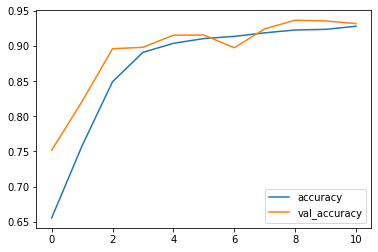

In [ ]:
losses[['loss','val_loss']].plot()
losses[['accuracy','val_accuracy']].plot()


In [ ]:
print(classifier.metrics_names,"=",classifier.evaluate_generator(test_set))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


['loss', 'accuracy'] = [0.19129100441932678, 0.9315942525863647]


In [ ]:
import glob
file=glob.glob("/content/Malaria Cells/testing_set/Uninfected/*.png")
predictions=[]
label=[]
for i in file:
  test_image = image.load_img(i, target_size = (64, 64))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  predictions.append([1 if classifier.predict(test_image)==1 else 0])
  label.append(1)
file=glob.glob("/content/Malaria Cells/testing_set/Parasitized/*.png")
for i in file:
  test_image = image.load_img(i, target_size = (64, 64))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  predictions.append([1 if classifier.predict(test_image)==1 else 0])
  label.append(0)
predictions=np.array(predictions)
label=np.array(label)

Test Accuracy = 0.87


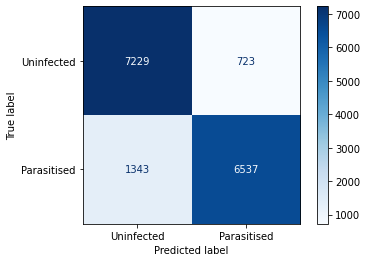

In [ ]:
accuracy = accuracy_score(label, predictions)
print('Test Accuracy = %.2f' % accuracy)

cm = confusion_matrix(label, predictions)

labels = ["Uninfected", "Parasitised"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
from keras.models import load_model
classifier=load_model("/content/drive/MyDrive/image project/malaria/model2022 (1).h5")

Uninfected


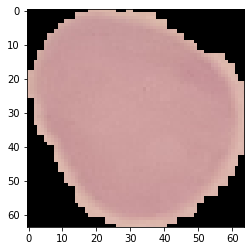

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Malaria Cells/testing_set/Uninfected/C111P72ThinF_IMG_20150930_113049_cell_66.png', target_size = (64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
if result[0][0] == 1:
     print('Uninfected')
else:
    print('Parasitised')
